In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [282]:
df = pd.read_excel('/Users/saki/Desktop/AI-Human-PewData.xlsx')

In [283]:
df.head()

,Unnamed: 0,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [284]:
len(df)

10260

In [285]:
c_df = df.iloc[0:10260]

predictors = ['F_METRO', 'F_CREGION', 'F_AGECAT','F_GENDER','F_EDUCCAT','F_EDUCCAT2','F_RELIG','F_PARTY_FINAL','F_INC_SDT1']
outcome = 'SMALG2_W99'

In [286]:
X = c_df[predictors]
y = c_df[outcome]
clean_df = c_df[predictors + [outcome]]
clean_df.head()


,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99
0,Metropolitan,West,65+,A man,College graduate+,College graduate/some post grad,Nothing in particular,Republican,"$50,000 to less than $60,000",NaN
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society
3,Metropolitan,West,50-64,A woman,College graduate+,Postgraduate,Protestant,Republican,"$100,000 or more",NaN
4,Metropolitan,South,65+,A woman,Some College,Associate's degree,Protestant,Independent,"$30,000 to less than $40,000",NaN


In [287]:
# Replace "refused" responses with NaN
# Assuming "refused" is represented as the string "Refused"
clean_df.replace("Refused", pd.NA, inplace=True)

clean_df = clean_df.dropna()

/var/folders/v8/61xx6l9j6t3bbm3w1j9thf480000gn/T/ipykernel_33111/604183416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.replace("Refused", pd.NA, inplace=True)


In [288]:
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society
5,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Bad idea for society
6,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
8,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Bad idea for society


In [289]:
clean_df["F_EDU"] = clean_df['F_EDUCCAT'] + ' : ' + clean_df['F_EDUCCAT2']
clean_df['F_LOCAL'] = clean_df['F_METRO'] + ' : ' + clean_df['F_CREGION']


In [290]:
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99,F_EDU,F_LOCAL
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Non-metropolitan : Midwest
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society,College graduate+ : Postgraduate,Metropolitan : Northeast
5,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Bad idea for society,College graduate+ : College graduate/some post...,Non-metropolitan : Midwest
6,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Metropolitan : South
8,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Bad idea for society,"Some College : Some college, no degree",Metropolitan : West


In [291]:
len(clean_df)

4835

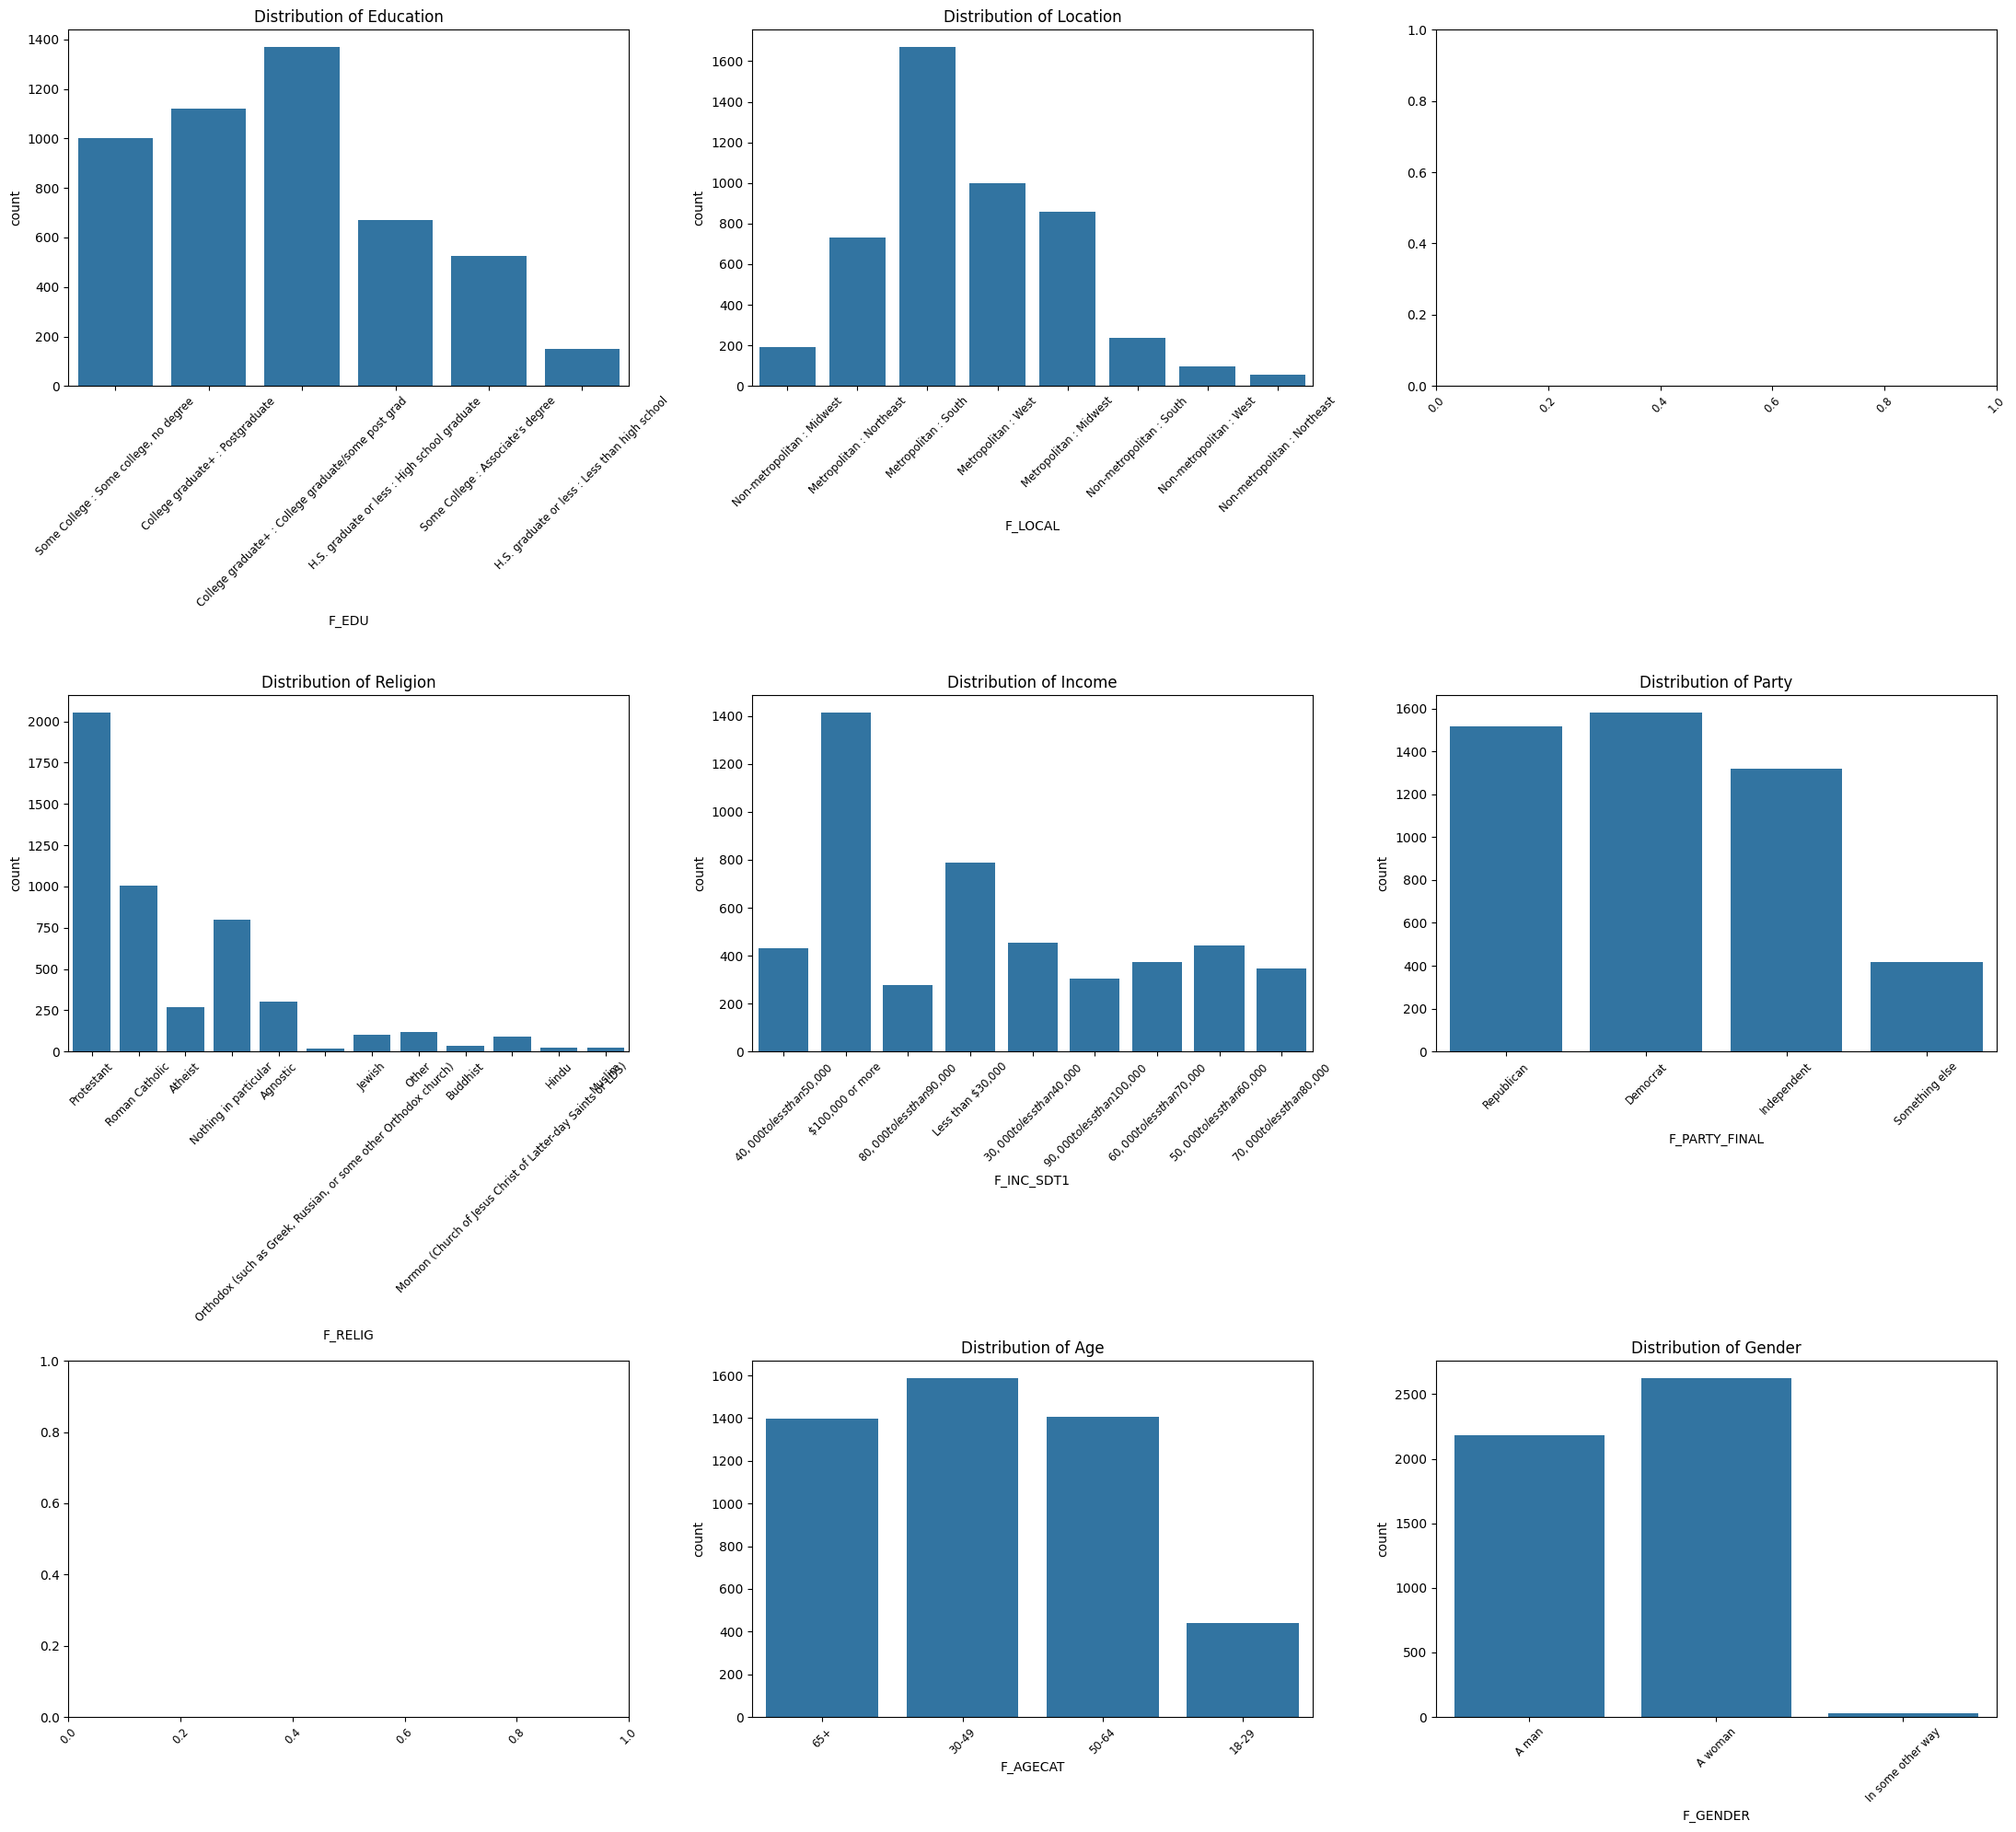

In [292]:
# Bar charts for categorical features
fig, axes = plt.subplots(3, 3, figsize=(22, 20))



sns.countplot(x='F_EDU', data=clean_df, ax=axes[0, 0]).set_title('Distribution of Education')
sns.countplot(x='F_LOCAL', data=clean_df, ax=axes[0, 1]).set_title('Distribution of Location')
sns.countplot(x='F_RELIG', data=clean_df, ax=axes[1, 0]).set_title('Distribution of Religion')
sns.countplot(x='F_INC_SDT1', data=clean_df, ax=axes[1, 1]).set_title('Distribution of Income')
sns.countplot(x='F_PARTY_FINAL', data=clean_df, ax=axes[1, 2]).set_title('Distribution of Party')
sns.countplot(x='F_AGECAT', data=clean_df, ax=axes[2, 1]).set_title('Distribution of Age')
sns.countplot(x='F_GENDER', data=clean_df, ax=axes[2, 2]).set_title('Distribution of Gender')


# Rotate x-axis labels for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45, labelsize='small')

plt.tight_layout()
plt.show()

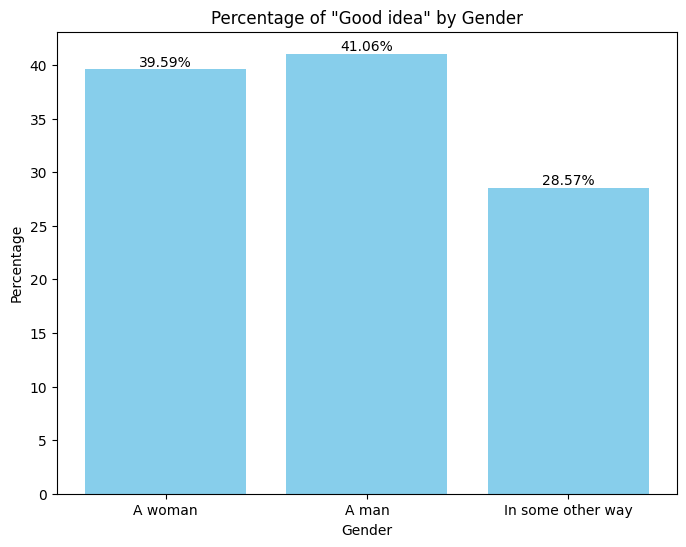

In [293]:
# filter good idea
good_idea_data = clean_df[clean_df['SMALG2_W99'] == 'Good idea for society']

# calculate percentage
gender_counts = clean_df['F_GENDER'].value_counts(normalize=True) * 100

# empty set
good_idea_percentages = []

# for loop for all
for gender in gender_counts.index:
    gender_data = good_idea_data[good_idea_data['F_GENDER'] == gender]
    good_idea_count = len(gender_data)
    total_count = len(clean_df[clean_df['F_GENDER'] == gender])
    good_idea_percentage = (good_idea_count / total_count) * 100
    good_idea_percentages.append(good_idea_percentage)

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, good_idea_percentages, color='skyblue')

# show percentage
for i in range(len(gender_counts)):
    plt.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Percentage of "Good idea" by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

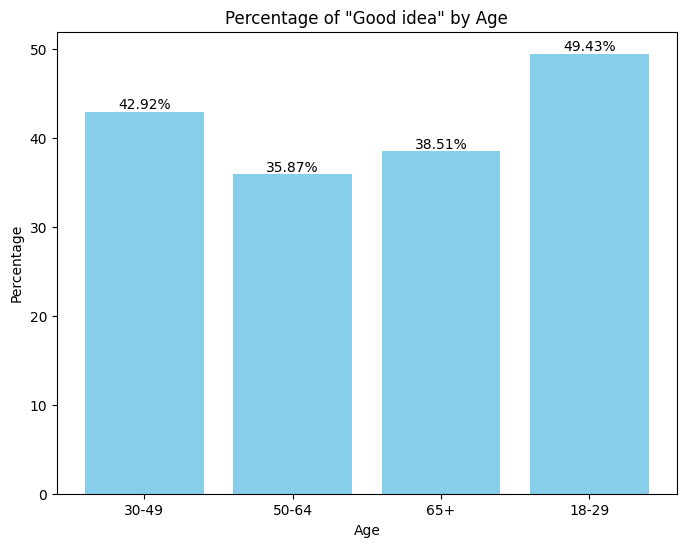

In [294]:
# calculate percentage
age_counts = clean_df['F_AGECAT'].value_counts(normalize=True) * 100

# empty set
good_idea_percentages = []

# for loop for all
for age in age_counts.index:
    age_data = good_idea_data[good_idea_data['F_AGECAT'] == age]
    good_idea_count = len(age_data)
    total_count = len(clean_df[clean_df['F_AGECAT'] == age])
    good_idea_percentage = (good_idea_count / total_count) * 100
    good_idea_percentages.append(good_idea_percentage)

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, good_idea_percentages, color='skyblue')

# show percentage
for i in range(len(age_counts)):
    plt.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Percentage of "Good idea" by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

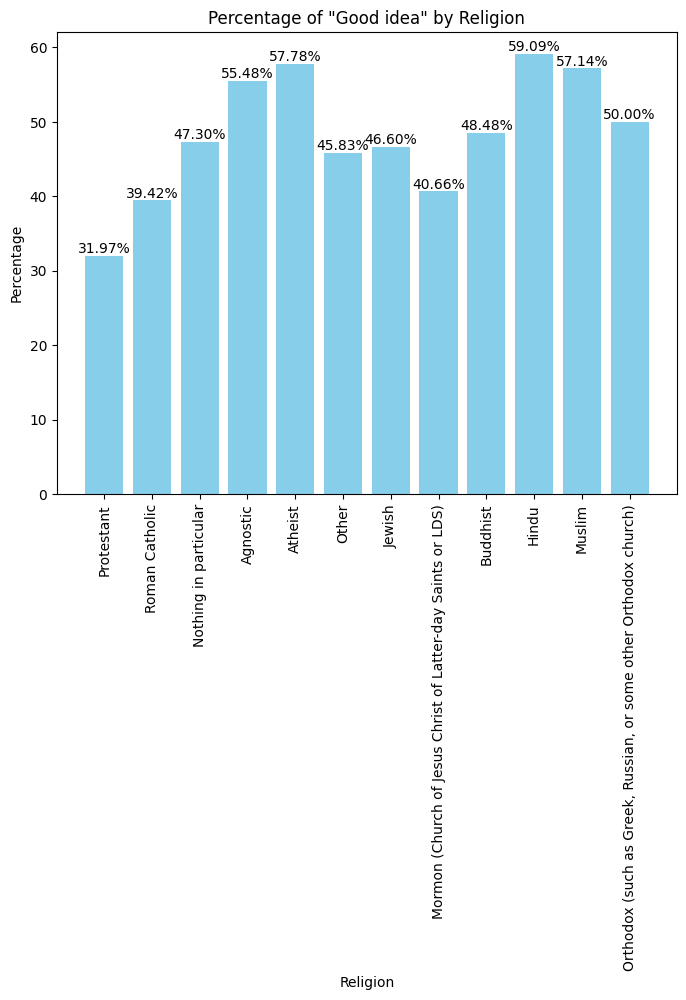

In [295]:
# calculate percentage
relig_counts = clean_df['F_RELIG'].value_counts(normalize=True) * 100

# empty set
good_idea_percentages = []

# for loop for all
for relig in relig_counts.index:
    relig_data = good_idea_data[good_idea_data['F_RELIG'] == relig]
    good_idea_count = len(relig_data)
    total_count = len(clean_df[clean_df['F_RELIG'] == relig])
    good_idea_percentage = (good_idea_count / total_count) * 100
    good_idea_percentages.append(good_idea_percentage)

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(relig_counts.index, good_idea_percentages, color='skyblue')

# show percentage
for i in range(len(relig_counts)):
    plt.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Percentage of "Good idea" by Religion')
plt.xlabel('Religion')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()


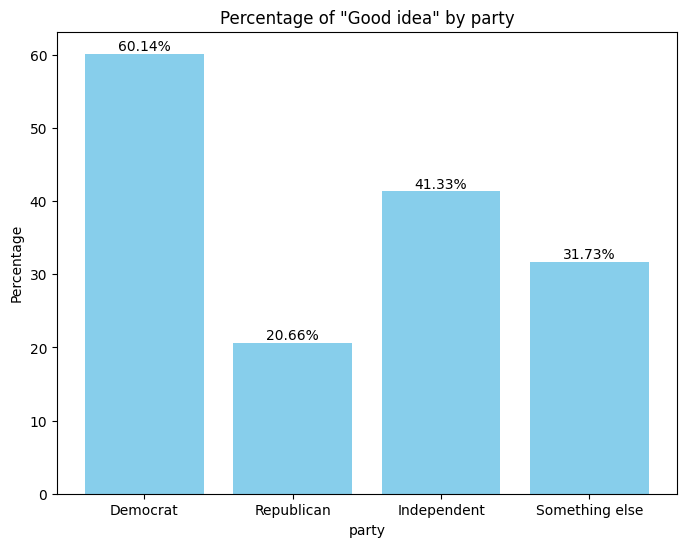

In [296]:
# calculate percentage
party_counts = clean_df['F_PARTY_FINAL'].value_counts(normalize=True) * 100

# empty set
good_idea_percentages = []

# for loop for all
for party in party_counts.index:
    party_data = good_idea_data[good_idea_data['F_PARTY_FINAL'] == party]
    good_idea_count = len(party_data)
    total_count = len(clean_df[clean_df['F_PARTY_FINAL'] == party])
    good_idea_percentage = (good_idea_count / total_count) * 100
    good_idea_percentages.append(good_idea_percentage)

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(party_counts.index, good_idea_percentages, color='skyblue')

# show percentage
for i in range(len(party_counts)):
    plt.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Percentage of "Good idea" by party')
plt.xlabel('party')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


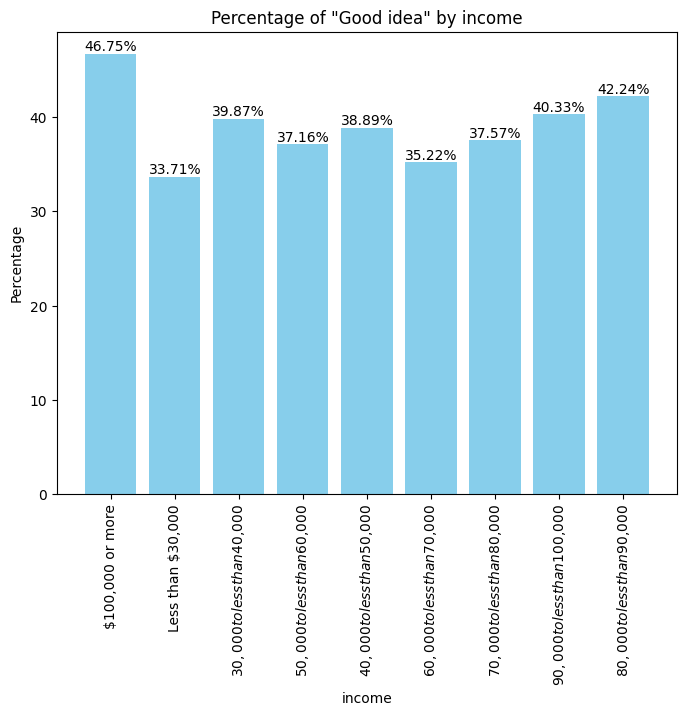

In [297]:

# calculate percentage
inc_counts = clean_df['F_INC_SDT1'].value_counts(normalize=True) * 100

# empty set
good_idea_percentages = []

# for loop for all
for income in inc_counts.index:
    income_data = good_idea_data[good_idea_data['F_INC_SDT1'] == income]
    good_idea_count = len(income_data)
    total_count = len(clean_df[clean_df['F_INC_SDT1'] == income])
    good_idea_percentage = (good_idea_count / total_count) * 100
    good_idea_percentages.append(good_idea_percentage)

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(inc_counts.index, good_idea_percentages, color='skyblue')

# show percentage
for i in range(len(inc_counts)):
    plt.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Percentage of "Good idea" by income')
plt.xlabel('income')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

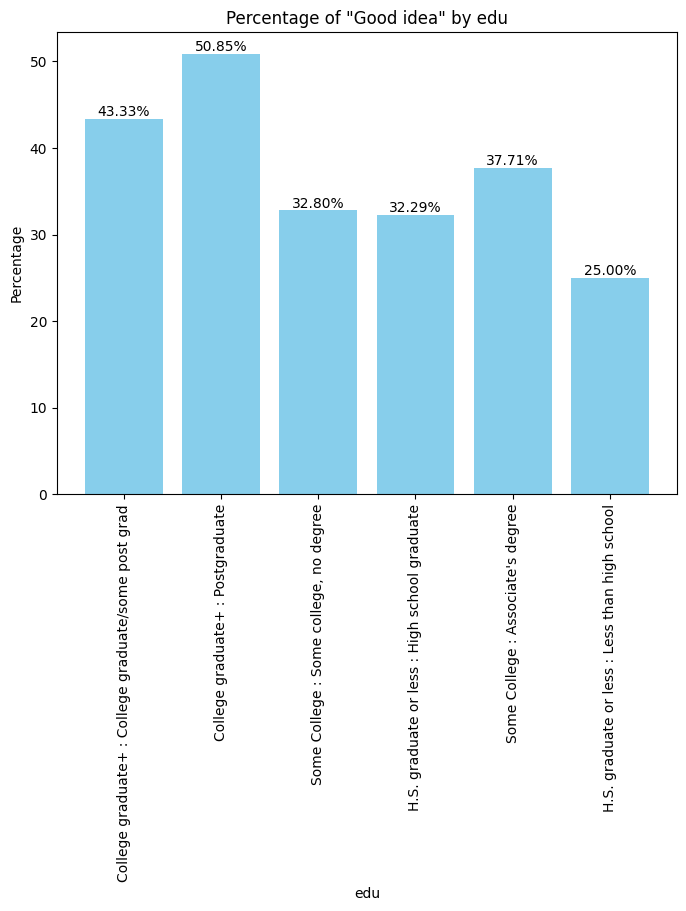

In [298]:


# calculate percentage
edu_counts = clean_df['F_EDU'].value_counts(normalize=True) * 100

# empty set
good_idea_percentages = []

# for loop for all
for edu in edu_counts.index:
    edu_data = good_idea_data[good_idea_data['F_EDU'] == edu]
    good_idea_count = len(edu_data)
    total_count = len(clean_df[clean_df['F_EDU'] == edu])
    good_idea_percentage = (good_idea_count / total_count) * 100
    good_idea_percentages.append(good_idea_percentage)

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(edu_counts.index, good_idea_percentages, color='skyblue')

# show percentage
for i in range(len(edu_counts)):
    plt.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Percentage of "Good idea" by edu')
plt.xlabel('edu')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

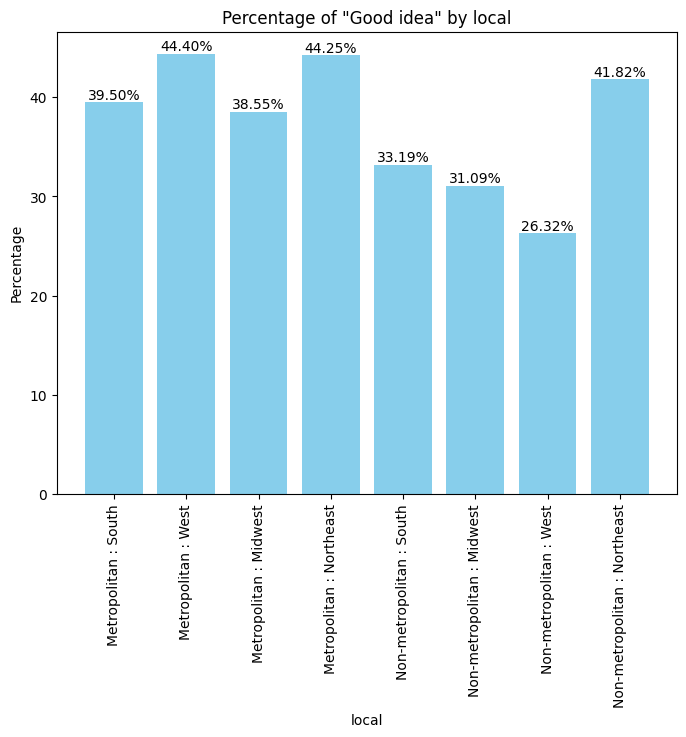

In [299]:


# calculate percentage
local_counts = clean_df['F_LOCAL'].value_counts(normalize=True) * 100

# empty set
good_idea_percentages = []

# for loop for all
for local in local_counts.index:
    local_data = good_idea_data[good_idea_data['F_LOCAL'] == local]
    good_idea_count = len(local_data)
    total_count = len(clean_df[clean_df['F_LOCAL'] == local])
    good_idea_percentage = (good_idea_count / total_count) * 100
    good_idea_percentages.append(good_idea_percentage)

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(local_counts.index, good_idea_percentages, color='skyblue')

# show percentage
for i in range(len(local_counts)):
    plt.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Percentage of "Good idea" by local')
plt.xlabel('local')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

